In [18]:
import pandas as pd
from statistics import mean, mode, median
import numpy as np
import seaborn as sns

In [19]:
data = pd.read_csv('Data.csv')

In [20]:
data.pivot_table(index = ['standard_type'], aggfunc='size')

standard_type
Activity         1
IC50          2190
INH             29
Inhibition      29
Kd               4
Ki              43
dtype: int64

In [21]:
data = data.query("standard_type == 'IC50'")

In [22]:
data.head()

,molecule_chembl_id,Smiles,standard_type,standard_value,standard_units,assay_type,assay_organism,target_organism
0,CHEMBL50412,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OC(C)(...,IC50,77.0,nM,B,Homo sapiens,Homo sapiens
1,CHEMBL537666,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,7.0,nM,B,Homo sapiens,Homo sapiens
2,CHEMBL538092,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,10.0,nM,B,Homo sapiens,Homo sapiens
3,CHEMBL536982,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,2.0,nM,B,Homo sapiens,Homo sapiens
4,CHEMBL536748,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,2.0,nM,B,Homo sapiens,Homo sapiens


In [23]:
data.pivot_table(index = ['standard_units'], aggfunc='size')

standard_units
nM    2190
dtype: int64

In [24]:
def statDescribe (data):
    data_min = min(data)
    data_max = max(data)
    data_mean = round(mean(data), 2)
    data_mode = mode(data)
    data_median = median(data)
    print('Минимальное значение: {0} \nМаксимальное значение: {1} \nСреднее значение: {2} \nМода: {3} \nМедиана: {4}'\
          .format(data_min, data_max, data_mean, data_mode, data_median))

In [25]:
statDescribe(data['standard_value'])

Минимальное значение: 2.6000000000000003e-10 
Максимальное значение: 300000.0 
Среднее значение: 1823.59 
Мода: 2.0 
Медиана: 9.0


In [26]:
def calcPic50(st_values):
    for i in range(0, len(st_values)):
        st_values[i] = st_values[i]*10**-9
        st_values[i] = round(-np.log10(st_values[i]), 3)
    return st_values

In [27]:
st_val = list(data['standard_value'])

In [28]:
pic50_vals = calcPic50(st_val)

/Users/maria/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


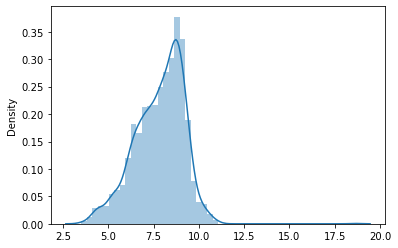

In [29]:
plot = sns.distplot(pic50_vals)

In [30]:
statDescribe(pic50_vals)

Минимальное значение: 3.523 
Максимальное значение: 18.585 
Среднее значение: 7.83 
Мода: 8.699 
Медиана: 8.046


In [31]:
data['pIC50'] = pic50_vals

In [32]:
data.head()

,molecule_chembl_id,Smiles,standard_type,standard_value,standard_units,assay_type,assay_organism,target_organism,pIC50
0,CHEMBL50412,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OC(C)(...,IC50,77.0,nM,B,Homo sapiens,Homo sapiens,7.114
1,CHEMBL537666,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,7.0,nM,B,Homo sapiens,Homo sapiens,8.155
2,CHEMBL538092,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,10.0,nM,B,Homo sapiens,Homo sapiens,8.000
3,CHEMBL536982,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,2.0,nM,B,Homo sapiens,Homo sapiens,8.699
4,CHEMBL536748,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,2.0,nM,B,Homo sapiens,Homo sapiens,8.699


In [33]:
data = data.query("pIC50 >= 6.0")
data.head()

,molecule_chembl_id,Smiles,standard_type,standard_value,standard_units,assay_type,assay_organism,target_organism,pIC50
0,CHEMBL50412,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OC(C)(...,IC50,77.0,nM,B,Homo sapiens,Homo sapiens,7.114
1,CHEMBL537666,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,7.0,nM,B,Homo sapiens,Homo sapiens,8.155
2,CHEMBL538092,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,10.0,nM,B,Homo sapiens,Homo sapiens,8.000
3,CHEMBL536982,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,2.0,nM,B,Homo sapiens,Homo sapiens,8.699
4,CHEMBL536748,COCCCOc1cc(C[C@@H](C[C@H](N)[C@@H](O)C[C@@H](C...,IC50,2.0,nM,B,Homo sapiens,Homo sapiens,8.699


In [34]:
data.to_csv('Data_ML.csv', index=False)

### Введение в RDkit, молекулярные дескрипторы 

In [35]:
from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors
from rdkit.Chem.Descriptors import rdMolDescriptors

ModuleNotFoundError: No module named 'rdkit'

In [36]:
smile = data['Smiles'][0]
smile

'CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)OC(C)(C)C)C(=O)N[C@@H](CC1CCCCC1)[C@@H](O)CCS(=O)(=O)C(C)C'

In [37]:
mol = Chem.MolFromSmiles(smile)
mol

NameError: name 'Chem' is not defined

In [38]:
type(mol)

NameError: name 'mol' is not defined

In [39]:
mol  = Chem.AddHs(mol)
mol

NameError: name 'Chem' is not defined

In [40]:
print(Chem.MolToMolBlock(mol))

NameError: name 'Chem' is not defined

In [41]:
AllChem.EmbedMolecule(mol)
mol

NameError: name 'AllChem' is not defined

In [42]:
print(Chem.MolToMolBlock(mol))

NameError: name 'Chem' is not defined

In [48]:
def describe_mol(mol):
    mw = round(Descriptors.MolWt(mol), 3)
    logP = round(Descriptors.MolLogP(mol), 3)
    des_obj = rdMolDescriptors.GetMACCSKeysFingerprint(mol)
    des = des_obj.ToBitString()
    print(f'Молекулярная масса: {mw} \nLogP: {logP} \nMACCSKeys: {des}')

In [49]:
describe_mol(mol)

Молекулярная масса: 477.496 
LogP: 0.83 
MACCSKeys: 00000000000000000100000000000000000001000011000000000010000000100010000000010101101101110111110111101100111100111100011011100111110101111110101111111011111111111111110
